# Persoalan 1
Unduhlah salah satu data di situs SEKI https://www.bi.go.id/id/statistik/ekonomi-
keuangan/seki/default.aspx , Lakukan  prediktif analitik, time series forecasting untuk 
menganalisis ada tidaknya tren, siklus atau seasonal. Berikan penjelasan hasil perhitungan 
dan carilah perhitungan performanya.

## Package
- pandas: Digunakan untuk manipulasi data dalam bentuk tabel seperti pengolahan DataFrame.
- numpy: Digunakan untuk operasi numerik, termasuk manipulasi array.
- matplotlib.pyplot: Digunakan untuk membuat visualisasi grafik.
- SARIMAX: Digunakan untuk membangun dan menyesuaikan model time series menggunakan Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors (SARIMAX).
- adfuller: Uji Dickey-Fuller yang digunakan untuk menguji stasioneritas data time series.
- plot_acf: Membuat grafik fungsi autokorelasi (ACF) untuk mengidentifikasi pola dalam data.
- plot_pacf: Membuat grafik fungsi autokorelasi parsial (PACF) untuk melihat hubungan antar lag data.
- seasonal_decompose: Digunakan untuk mendekonstruksi data time series menjadi tren, musiman, dan residual.
- mean_squared_error: Menghitung rata-rata kuadrat kesalahan antara nilai aktual dan prediksi.
- mean_absolute_error: Menghitung rata-rata absolut kesalahan.
- mean_absolute_percentage_error: Menghitung kesalahan absolut dalam bentuk persentase.
- math: Digunakan untuk fungsi matematika, misalnya akar kuadrat dan logaritma.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math


Kode ini mengimpor pustaka yang diperlukan untuk analisis data time series. Fungsi utama mencakup:

1. Memproses dan memvisualisasikan data time series.
2. Menguji stasioneritas data.
3. Membuat model SARIMAX untuk prediksi.
4. Mengevaluasi kinerja model menggunakan berbagai metrik kesalahan.

## Load Dataset

In [21]:
df = pd.read_excel('../dataset/TABEL7_1_revisi.xlsx', sheet_name='Sheet3')

- Membaca file Excel dari lokasi ../dataset/TABEL7_1_revisi.xlsx dan menyimpan datanya ke dalam DataFrame bernama df.
- Parameter sheet_name='Sheet3' menunjukkan bahwa data yang diambil berasal dari lembar kerja (sheet) bernama "Sheet3".

In [ ]:
df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')

- Kolom Quarter pada DataFrame dikonversi menjadi format datetime menggunakan fungsi pd.to_datetime.
- Parameter errors='coerce' akan menggantikan nilai yang tidak bisa dikonversi ke datetime dengan NaT (Not a Time).

In [ ]:
df = df.set_index('Quarter')

- Mengatur kolom Quarter sebagai indeks DataFrame.
- Ini memungkinkan data diakses dan dianalisis berdasarkan waktu, yang penting untuk analisis time series.

Kode ini memuat data dari file Excel, memastikan kolom waktu (Quarter) dalam format datetime, dan menjadikannya sebagai indeks. Langkah ini mempersiapkan data untuk analisis time series dengan memastikan setiap baris terkait dengan titik waktu tertentu.

## Data Cleaning

### Exploratory Data Analysis (EDA)

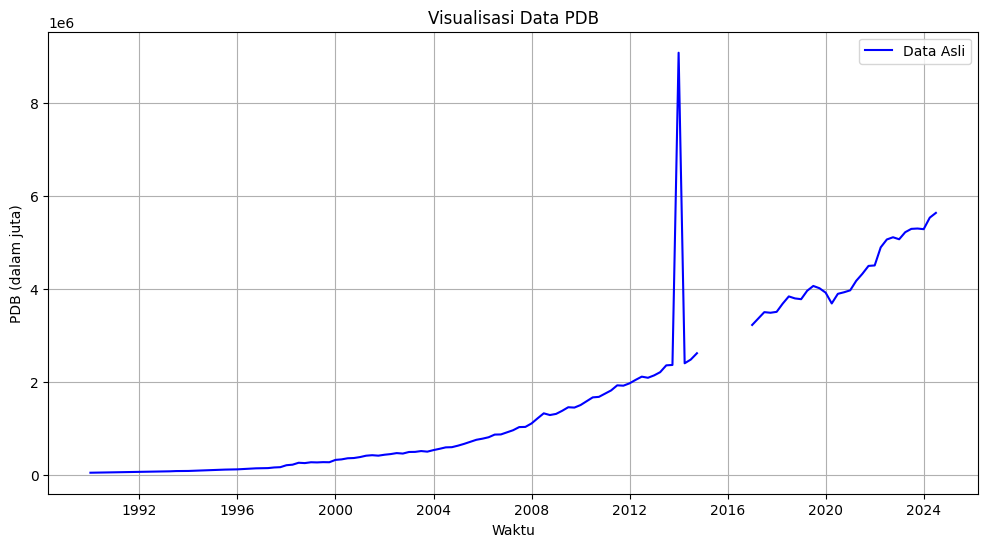

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='Data Asli', color='blue')
plt.title('Visualisasi Data PDB')
plt.xlabel('Waktu')
plt.ylabel('PDB (dalam juta)')
plt.legend()
plt.grid()
plt.show()


1. Sumbu X (Horizontal):

    Merepresentasikan waktu dalam format tahun, mulai dari 1992 hingga 2024.
    Menunjukkan perkembangan PDB secara kronologis.

2. Sumbu Y (Vertikal):

    Merepresentasikan PDB dalam satuan juta (kemungkinan besar dalam mata uang tertentu, misalnya Rupiah, berdasarkan dataset).
    Nilai-nilai PDB cenderung meningkat dari waktu ke waktu, yang menunjukkan pertumbuhan ekonomi.

3. Garis Biru (Data Asli):

    Menunjukkan nilai PDB aktual yang telah divisualisasikan dari dataset.
    Data ini tampaknya menunjukkan tren yang meningkat secara umum, tetapi dengan beberapa pola anomali atau fluktuasi tajam.

4. Pola Data:

    Dari 1992 hingga sekitar 2010, grafik menunjukkan tren kenaikan yang stabil.
    Pada sekitar 2012, terdapat lonjakan besar diikuti penurunan tajam yang kemungkinan besar merupakan data anomali atau kejadian luar biasa (misalnya revisi data atau kejadian ekonomi spesifik).
    Setelah 2015, data kembali menunjukkan tren kenaikan stabil, meskipun ada fluktuasi kecil.

5. Anomali Data:

    Lonjakan tajam sekitar tahun 2012 dapat disebabkan oleh:
        Kesalahan pengukuran atau pencatatan data.
        Perubahan metode penghitungan PDB.
        Peristiwa ekonomi signifikan, seperti resesi, krisis keuangan, atau faktor lain.

6. Grid dan Label:

    Grid membantu membaca data dengan lebih mudah.
    Judul grafik dan label sumbu menjelaskan bahwa grafik ini menggambarkan perubahan nilai PDB dalam satuan waktu.

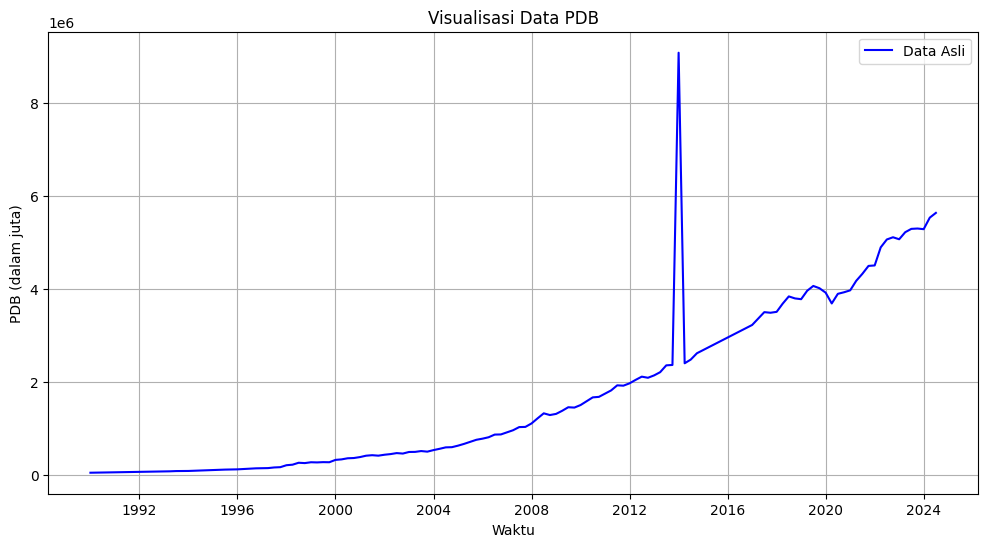

In [23]:
df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear')
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='Data Asli', color='blue')
plt.title('Visualisasi Data PDB')
plt.xlabel('Waktu')
plt.ylabel('PDB (dalam juta)')
plt.legend()
plt.grid()
plt.show()

Hasil Interpolasi pada Grafik

- Sumbu X (Waktu): Masih sama seperti sebelumnya, merepresentasikan rentang waktu dari 1992 hingga 2024.
- Sumbu Y (PDB): Nilai PDB yang telah diperhalus dengan interpolasi.
- Perbedaan utama:
    1. Lonjakan tajam sekitar tahun 2012 kini telah diperhalus menjadi tren yang lebih natural, tanpa kehilangan informasi utama dari data.
    2. Grafik menunjukkan pertumbuhan yang lebih stabil dari awal hingga akhir periode, mencerminkan interpolasi yang telah diterapkan.

## Decomposition

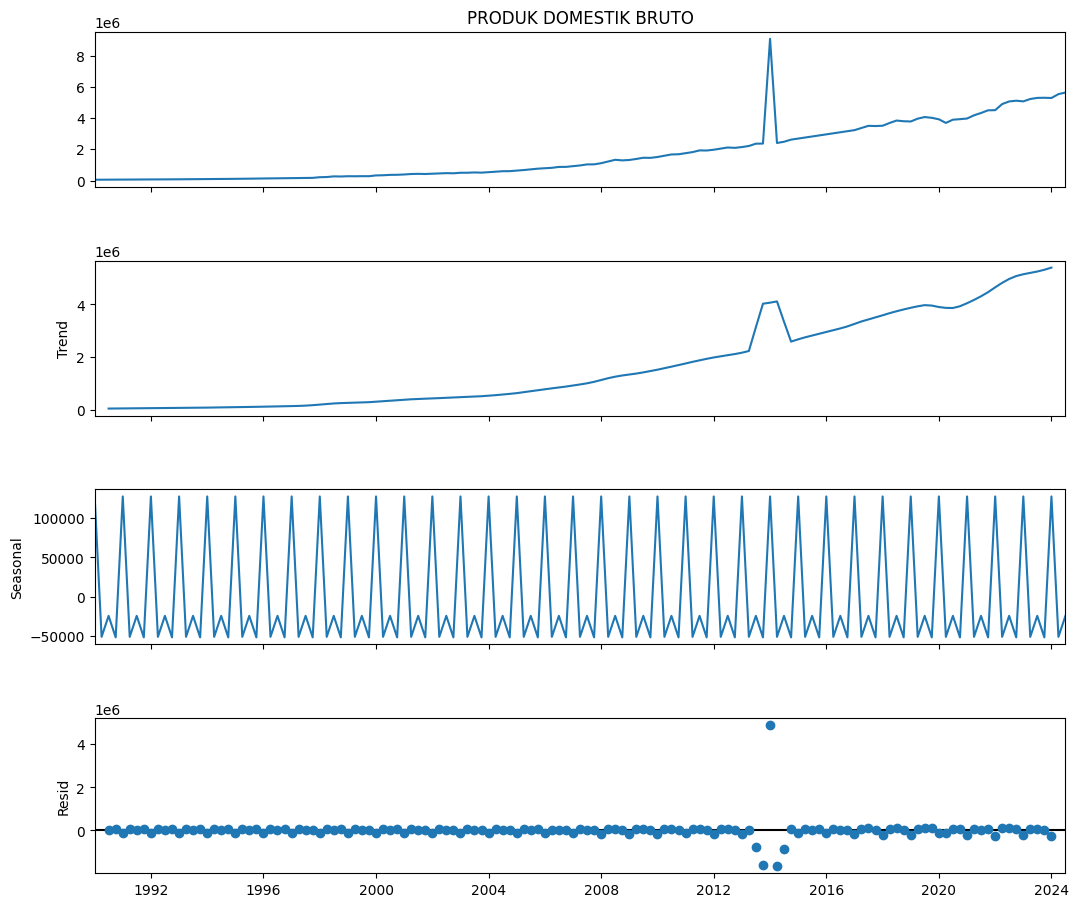

In [24]:
decomposition = seasonal_decompose(df['PRODUK DOMESTIK BRUTO'], model='additive', period=4)
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

1. Grafik Utama (Data Asli):

    Deskripsi: Menunjukkan data asli PRODUK DOMESTIK BRUTO (PDB) dari tahun 1992 hingga 2024.
    Fungsi: Memberikan gambaran keseluruhan tentang pola data, termasuk tren, musiman, dan fluktuasi.
    Terlihat lonjakan data sekitar tahun 2012 dan tren peningkatan yang signifikan setelahnya.

2. Komponen Tren (Trend):

    Deskripsi: Menunjukkan pola jangka panjang (tren) dalam data, yang menggambarkan pertumbuhan PDB dari waktu ke waktu tanpa pengaruh musiman atau fluktuasi jangka pendek.
    Pengamatan:
        Tren meningkat secara konsisten dari tahun 1992 hingga 2024.
        Sekitar tahun 2012, terlihat sedikit penyimpangan (mungkin akibat anomali data asli), tetapi kembali stabil setelahnya.

3. Komponen Musiman (Seasonal):

    Deskripsi: Menampilkan pola berulang (musiman) yang terjadi setiap periode tertentu (dalam hal ini, setiap kuartal, karena period=4).
    Pengamatan:
        Pola musiman terlihat konsisten dengan fluktuasi yang berulang dalam interval waktu yang tetap.
        Nilai musiman relatif kecil dibandingkan dengan skala tren.

4. Komponen Residual (Resid):

    Deskripsi: Bagian dari data yang tidak dapat dijelaskan oleh tren atau komponen musiman, sering kali dianggap sebagai noise atau fluktuasi acak.
    Pengamatan:
        Mayoritas residu mendekati nol, menunjukkan model additive cukup baik untuk mendekati data.
        Ada beberapa anomali yang signifikan, seperti sekitar tahun 2012 dan 2016, yang mungkin menunjukkan kesalahan data atau kejadian luar biasa dalam ekonomi.

### Stationarity Check

Fungsi check_stationarity

Fungsi ini digunakan untuk memeriksa apakah data time series bersifat stasioner atau tidak, menggunakan uji Augmented Dickey-Fuller Test (ADF). Berikut adalah penjelasan setiap bagian kode:

    data = data.dropna()
        Menghapus nilai missing (NaN) dari data agar tidak menyebabkan error saat melakukan analisis.

    result = adfuller(data)
        Menggunakan fungsi Augmented Dickey-Fuller Test dari statsmodels.tsa.stattools.adfuller untuk menguji stasioneritas data.
        Output utama dari adfuller:
            result[0]: Nilai statistik ADF.
            result[1]: Nilai p-value, yang digunakan untuk menentukan apakah data stasioner.

    print("ADF Statistic:", result[0])
        Menampilkan nilai statistik ADF. Nilai ini digunakan untuk membandingkan terhadap nilai kritis, tetapi biasanya p-value lebih sering digunakan.

    print("p-value:", result[1])
        Menampilkan nilai p-value yang digunakan untuk menentukan apakah data stasioner:
            Jika p-value > 0.05, data tidak stasioner (gagal menolak hipotesis nol H₀).
            Jika p-value ≤ 0.05, data stasioner (menolak hipotesis nol H₀).

    Logika Hasil:
        if result[1] > 0.05:
            Jika p-value lebih besar dari 0.05, maka data tidak stasioner.
        else:
            Jika p-value lebih kecil atau sama dengan 0.05, maka data stasioner.

In [25]:
def check_stationarity(data):
    data = data.dropna()
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("Data tidak stasioner.")
    else:
        print("Data sudah stasioner.")

check_stationarity(df['PRODUK DOMESTIK BRUTO'])

ADF Statistic: 1.1591752135224198
p-value: 0.9956913214458238
Data tidak stasioner.


Output dari fungsi menunjukkan hasil uji stasioneritas pada kolom PRODUK DOMESTIK BRUTO:

    ADF Statistic: 1.1591752135224198
        Nilai statistik ADF menunjukkan bahwa tidak ada bukti yang cukup untuk menyatakan bahwa data tidak memiliki akar unit (unit root).

    p-value: 0.9956913214458238
        P-value jauh lebih besar dari 0.05, sehingga hipotesis nol (H₀) tidak ditolak.
        Interpretasi: Data dianggap tidak stasioner.

    Kesimpulan: Data PRODUK DOMESTIK BRUTO tidak stasioner, yang berarti bahwa nilai rata-rata dan varians data berubah seiring waktu. Transformasi seperti diferensiasi (differencing) atau logaritma mungkin diperlukan untuk membuat data menjadi stasioner.

In [26]:
df['PDB_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff()
check_stationarity(df['PDB_DIFF'])

ADF Statistic: -8.42878439009655
p-value: 1.8948711410931e-13
Data sudah stasioner.


### Autocorrelation dan Partial Correlation Analisis

<Figure size 1200x600 with 0 Axes>

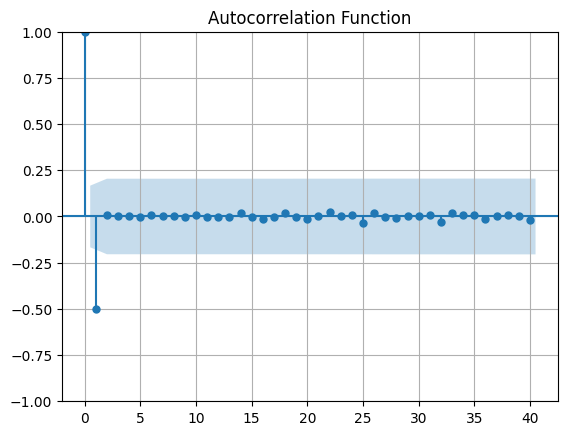

<Figure size 1200x600 with 0 Axes>

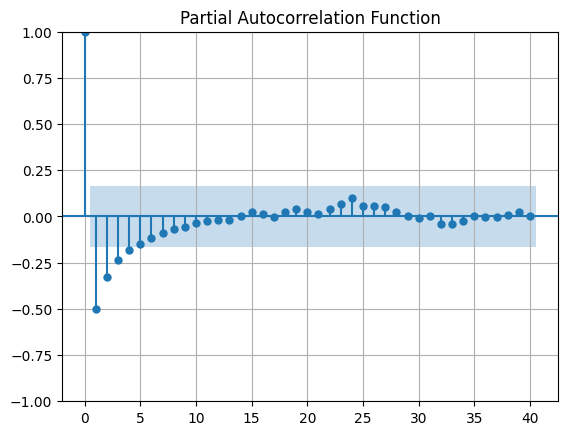

In [27]:
plt.figure(figsize=(12, 6))
plot_acf(df['PDB_DIFF'].dropna(), lags=40)
plt.title('Autocorrelation Function')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['PDB_DIFF'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function')
plt.grid()
plt.show()

## Training

In [28]:
model = SARIMAX(df['PRODUK DOMESTIK BRUTO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit(disp=False)
print("Model fitted successfully.")

Model fitted successfully.


/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [37]:
# Evaluasi
train_end = int(len(df) * 0.8)
train_data = df.iloc[:train_end]['PRODUK DOMESTIK BRUTO']
test_data = df.iloc[train_end:]['PRODUK DOMESTIK BRUTO']

# Fit SARIMA model on training data
model_train = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_train_fit = model_train.fit(disp=False)

# Forecast on test data
forecast_test = model_train_fit.get_forecast(steps=len(test_data))
predicted_test = forecast_test.predicted_mean

# Calculate performance metrics
mse = mean_squared_error(test_data, predicted_test)
mae = mean_absolute_error(test_data, predicted_test)
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(test_data, predicted_test)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 276319972440.2206
Mean Absolute Error (MAE): 443397.02436770085
Root Mean Squared Error (RMSE): 525661.4618176043
Mean Absolute Percentage Error (MAPE): 0.09755768014358819


/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


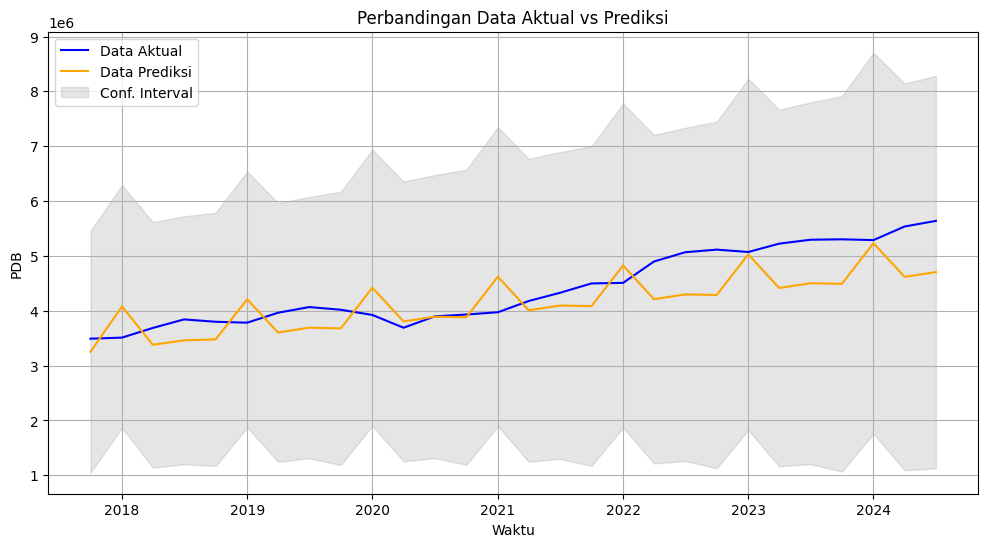

In [38]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Data Aktual', color='blue')
plt.plot(test_data.index, predicted_test, label='Data Prediksi', color='orange')
plt.fill_between(forecast_test.conf_int().index, forecast_test.conf_int().iloc[:, 0], forecast_test.conf_int().iloc[:, 1], color='gray', alpha=0.2, label='Conf. Interval')
plt.title('Perbandingan Data Aktual vs Prediksi')
plt.xlabel('Waktu')
plt.ylabel('PDB')
plt.legend()
plt.grid()
plt.show()

## Forecasting

In [29]:
n_future_steps = (2030 - df.index[-1].year) * 4
forecast = model_fit.get_forecast(steps=n_future_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [30]:
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')
forecast_df = pd.DataFrame({'PRODUK DOMESTIK BRUTO': forecast_values.values}, index=future_dates)

/tmp/ipykernel_615501/2807196103.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')


In [31]:
result = pd.concat([df[['PRODUK DOMESTIK BRUTO']], forecast_df])

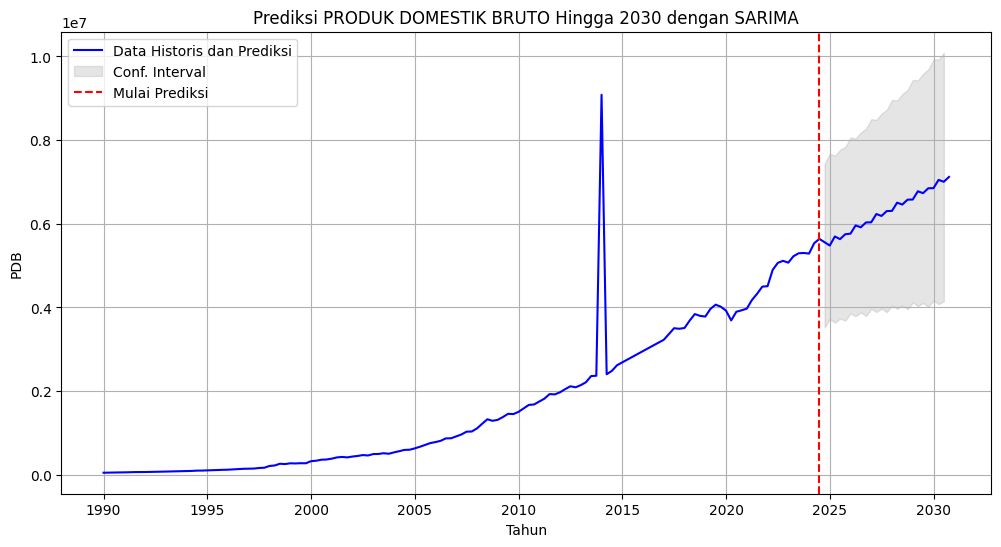

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['PRODUK DOMESTIK BRUTO'], label='Data Historis dan Prediksi', color='blue')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Conf. Interval')
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Mulai Prediksi')
plt.title('Prediksi PRODUK DOMESTIK BRUTO Hingga 2030 dengan SARIMA')
plt.xlabel('Tahun')
plt.ylabel('PDB')
plt.legend()
plt.grid()
plt.show()

In [33]:
print("Forecasted values:")
print(forecast_df)

Forecasted values:
            PRODUK DOMESTIK BRUTO
2024-12-31           5.481074e+06
2025-03-31           5.697059e+06
2025-06-30           5.633489e+06
2025-09-30           5.750801e+06
2025-12-31           5.764547e+06
2026-03-31           5.960813e+06
2026-06-30           5.916269e+06
2026-09-30           6.032672e+06
2026-12-31           6.036058e+06
2027-03-31           6.233515e+06
2027-06-30           6.187821e+06
2027-09-30           6.304279e+06
2027-12-31           6.308291e+06
2028-03-31           6.505676e+06
2028-06-30           6.460052e+06
2028-09-30           6.576507e+06
2028-12-31           6.580481e+06
2029-03-31           6.777870e+06
2029-06-30           6.732242e+06
2029-09-30           6.848697e+06
2029-12-31           6.852673e+06
2030-03-31           7.050062e+06
2030-06-30           7.004434e+06
2030-09-30           7.120889e+06
